# **Data Preprocessing:**

#**1: Load the Dataset**

In [133]:
import pandas as pd

In [134]:
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name='data')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

#**2: Handle Missing Values**

In [135]:
from sklearn.impute import SimpleImputer
import numpy as np

In [136]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#**3: Remove Outliers**

In [137]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1

In [138]:
mask = ~((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df_imputed[mask]
df_no_outliers.shape

(2875, 12)

#**4: Feature Scaling**

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

**Final Preprocessed Data**

In [141]:
X = df_scaled.copy()
X.head()


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.834643 -0.438859         0.0  -0.719055        0.0        0.0   
1 -1.833775 -0.647735         0.0  -0.719055        0.0        0.0   
2 -1.832907 -0.128773         0.0  -0.719055        0.0        0.0   
3 -1.832038 -0.752607         0.0  -0.719055        0.0        0.0   
4 -1.830302 -0.714019         0.0  -0.719055        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.783131    -1.081732          -0.378837        -0.409708   
1    -0.780130    -0.952735          -0.378837        -0.409708   
2    -0.494075    -0.694742          -0.378837        -0.409708   
3    -0.759268    -1.081732          -0.378837        -0.409708   
4    -0.795867    -1.210728          -0.378837        -0.409708   

   Days_since_enroll    Award?  
0           1.503693 -0.623072  
1           1.488035 -0.623072  
2           1.520330 -0.623072  
3           1.480206 -0.623072  
4           1.475312 -0.623072

#**EXPLORATORY DATA ANALYSIS (EDA)**

#**5: Summary Statistics**

In [142]:
df_scaled.describe()


ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  2875.000000  2.875000e+03      2875.0  2.875000e+03     2875.0   
mean      0.000000 -7.908650e-17         0.0 -7.908650e-17        0.0   
std       1.000174  1.000174e+00         0.0  1.000174e+00        0.0   
min      -1.834643 -1.098253e+00         0.0 -7.190547e-01        0.0   
25%      -0.852984 -7.408945e-01         0.0 -7.190547e-01        0.0   
50%       0.046183 -3.171815e-01         0.0 -7.190547e-01        0.0   
75%       0.857648  4.492551e-01         0.0  1.013789e+00        0.0   
max       1.656087  3.656806e+00         0.0  2.746632e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     2875.0  2.875000e+03  2.875000e+03       2.875000e+03   
mean         0.0 -5.931487e-17  8.402940e-17       1.482872e-17   
std          0.0  1.000174e+00  1.000174e+00       1.000174e+00   
min          0.0 -7.958670e-01 -1.210728e+00      -3.788372e-01   
25%          0.0 -7.592685e-01 -9.527351e-01      -3.788372e-01   
50%          0.0 -4.664800e-01 -4.975903e-02      -3.788372e-01   
75%          0.0  4.549983e-01  7.242205e-01      -3.788372e-01   
max          0.0  3.404329e+00  3.691142e+00       4.711239e+00   

       Flight_trans_12  Days_since_enroll        Award?  
count     2.875000e+03       2.875000e+03  2.875000e+03  
mean      2.965744e-17      -7.908650e-17  9.885812e-18  
std       1.000174e+00       1.000174e+00  1.000174e+00  
min      -4.097077e-01      -1.917616e+00 -6.230716e-01  
25%      -4.097077e-01      -8.672958e-01 -6.230716e-01  
50%      -4.097077e-01      -5.967701e-02 -6.230716e-01  
75%      -4.097077e-01       8.020114e-01  1.604952e+00  
max       3.716071e+00       2.137849e+00  1.604952e+00

#**6: Correlation Heatmap**

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

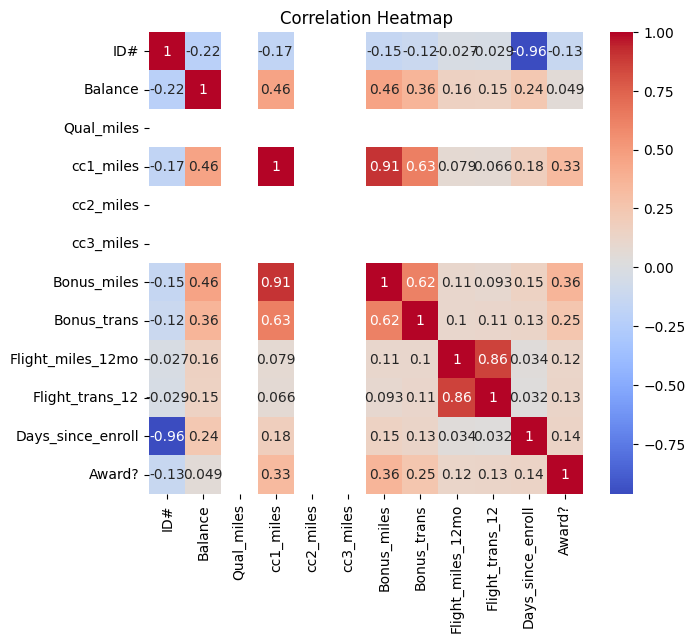

In [144]:
plt.figure(figsize=(7,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#**7: Pair Plot (if dataset has < 7 columns)**

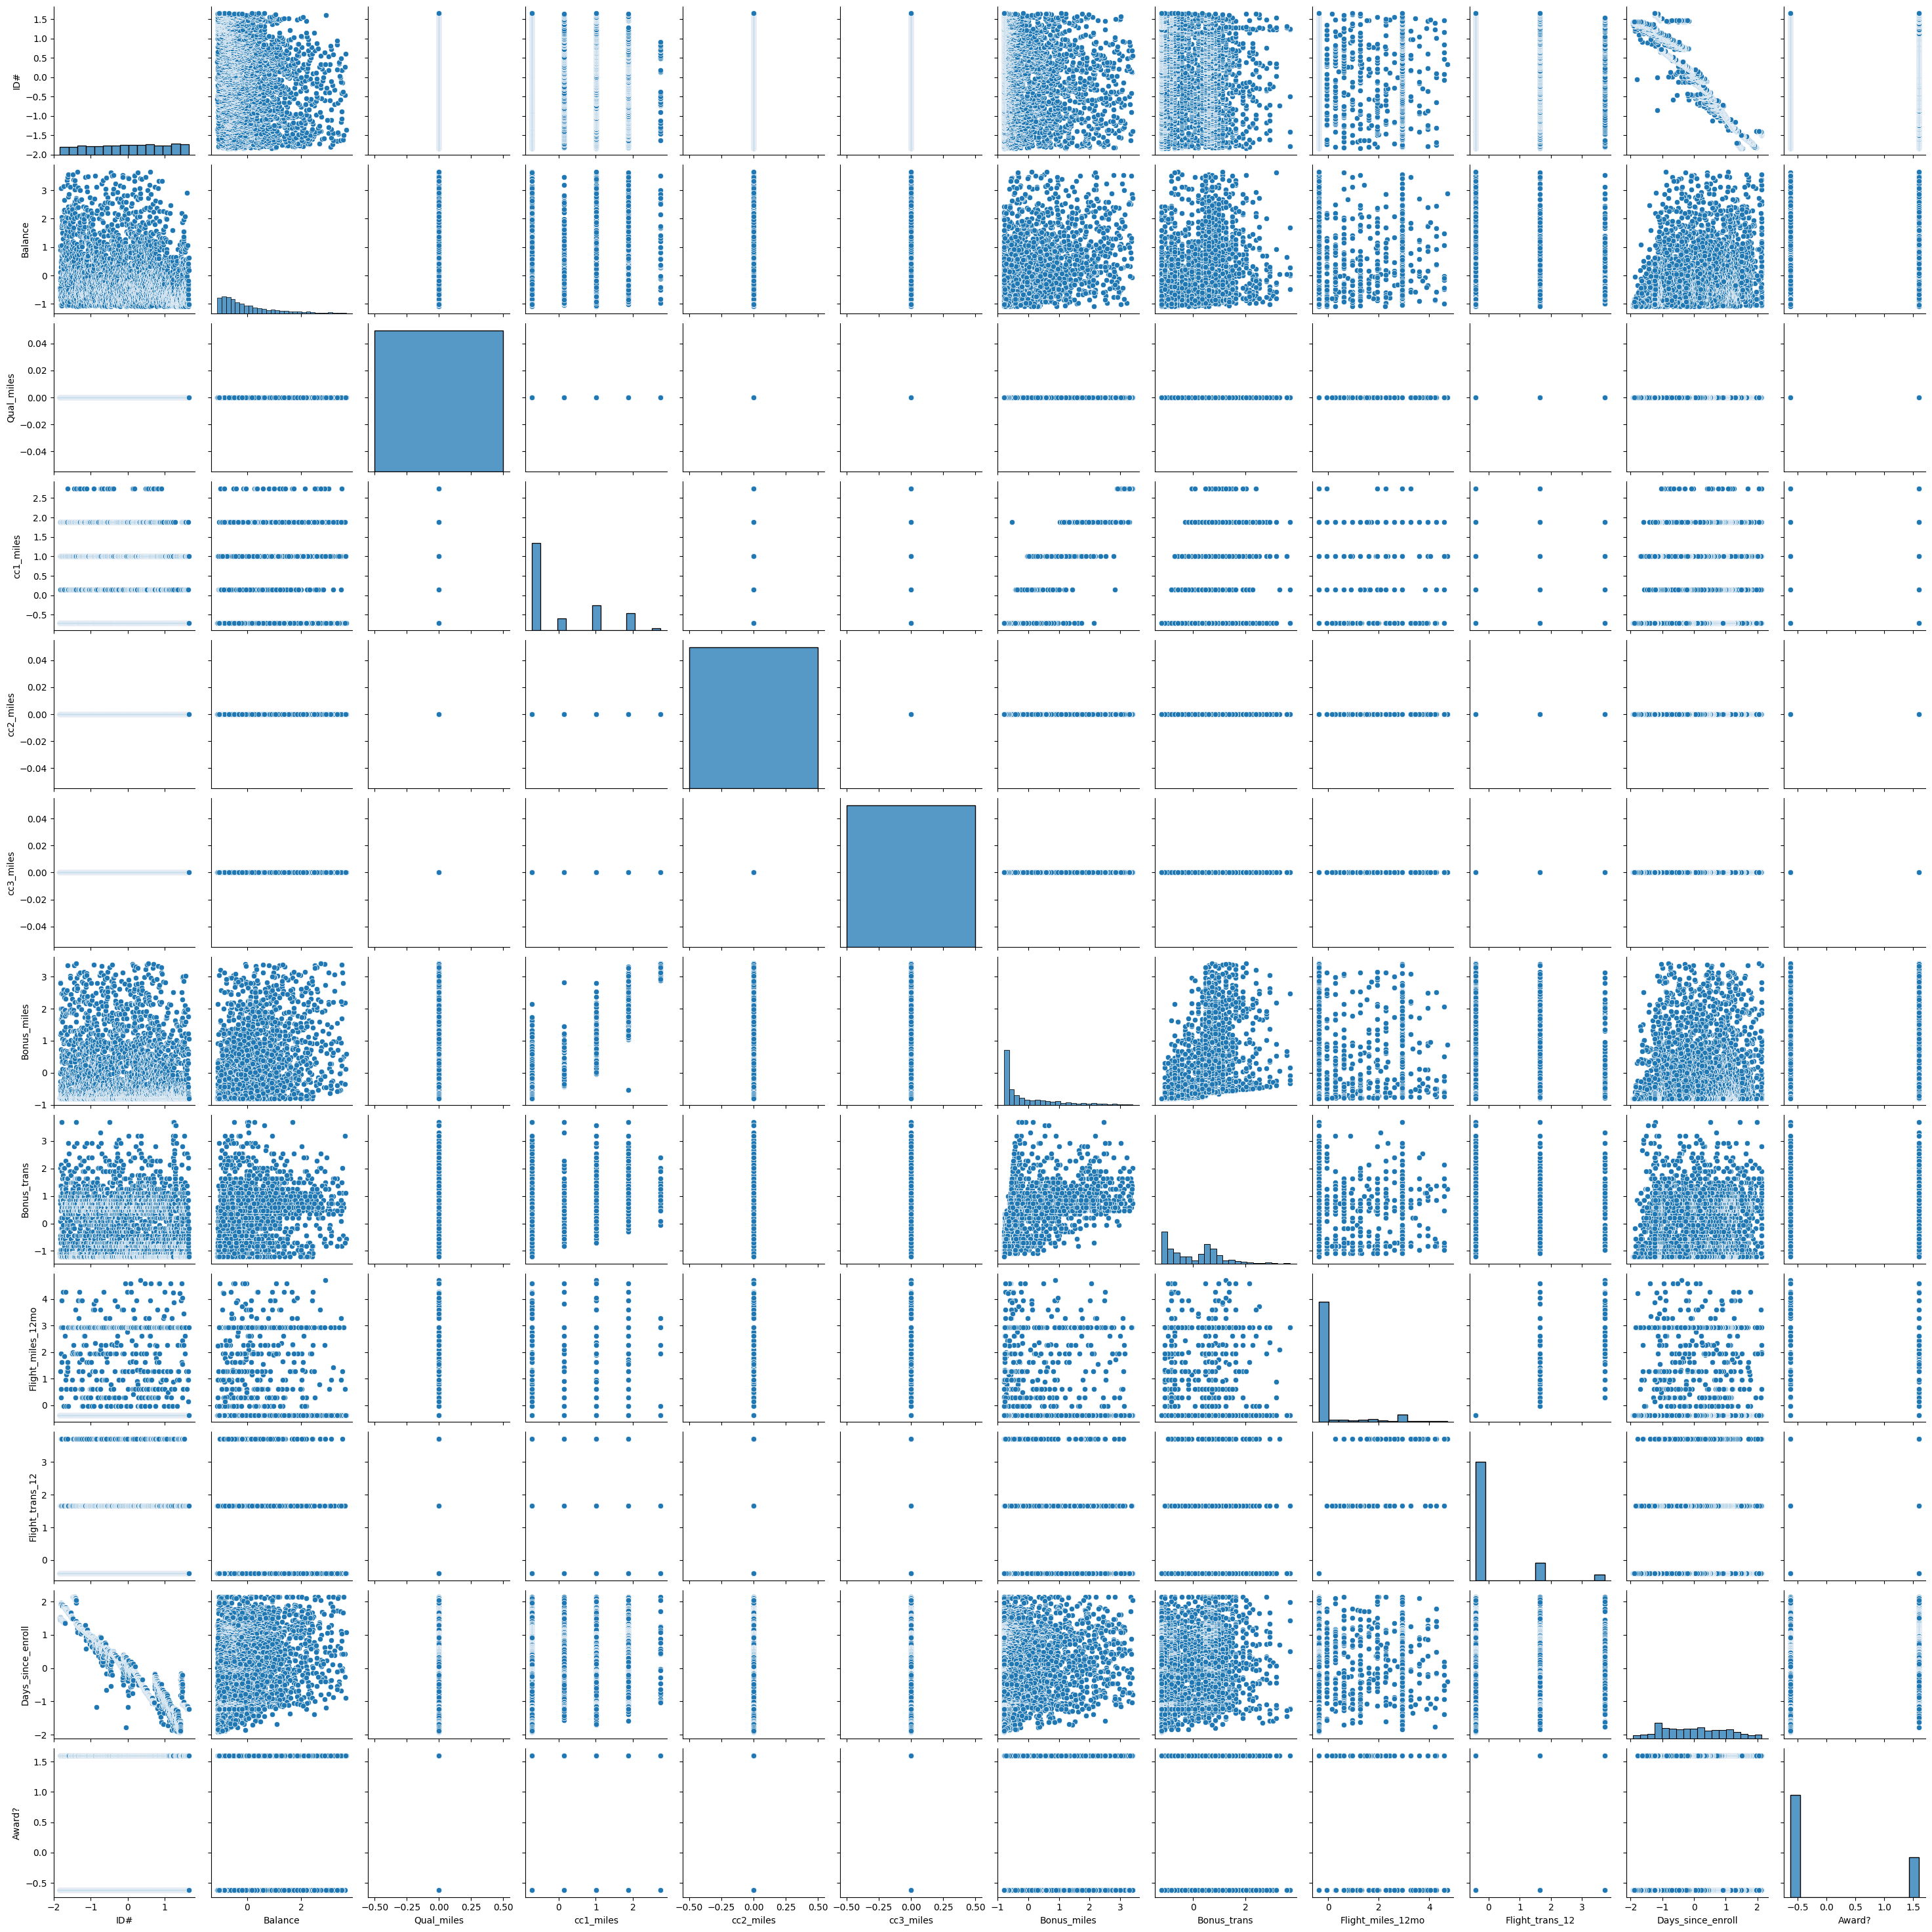

In [145]:
sns.pairplot(df_scaled)
plt.show()


#**8: PCA for Visualizing Potential Clusters**

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

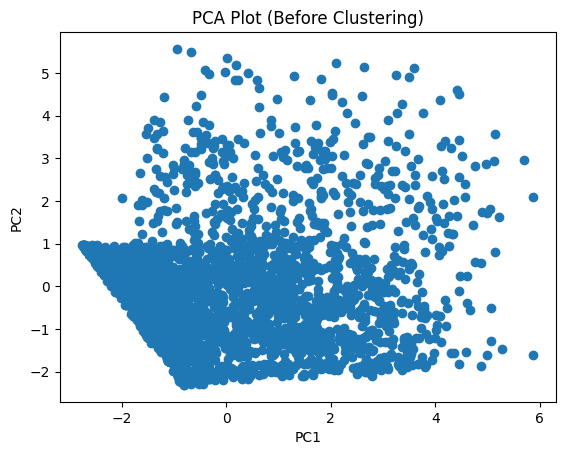

In [148]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("PCA Plot (Before Clustering)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#**USE MULTIPLE VISUALIZATIONS TO FIND PATTERNS**

**Histograms**

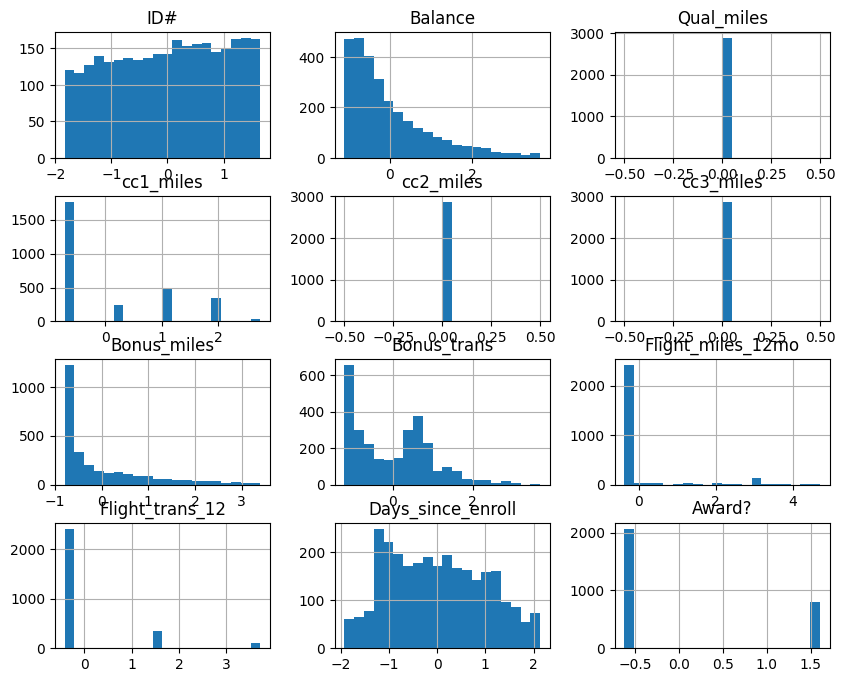

In [149]:
df_scaled.hist(figsize=(10,8), bins=20)
plt.show()


**Boxplots**

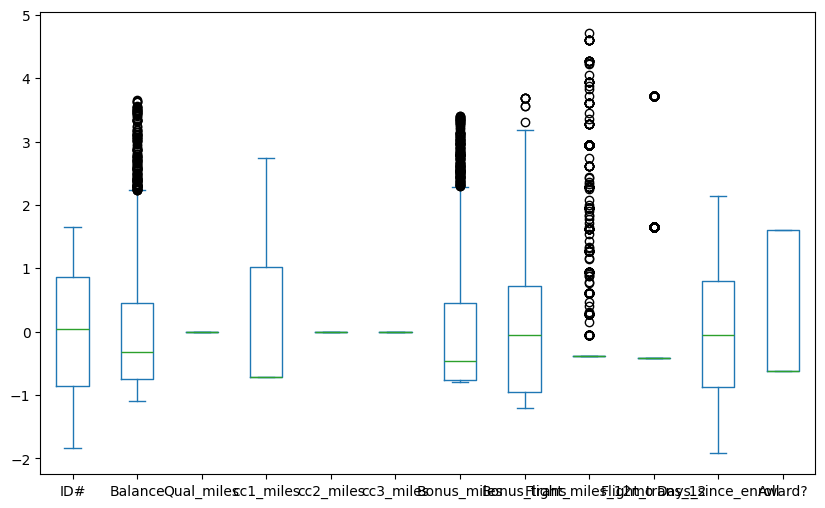

In [150]:
df_scaled.plot(kind='box', figsize=(10,6))
plt.show()


**Scatter Plots**

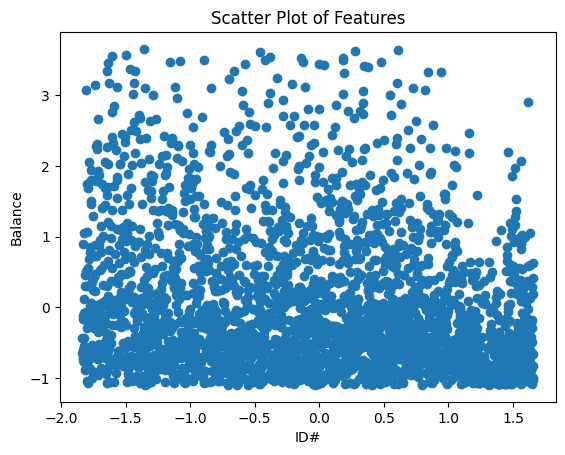

In [151]:
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1])
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title("Scatter Plot of Features")
plt.show()


#**2 — IMPLEMENTING K-MEANS CLUSTERING**

**1: Use the Elbow Method to Find Best K**

In [152]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [153]:
inertias = []
K_range = range(2, 11)

In [154]:
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

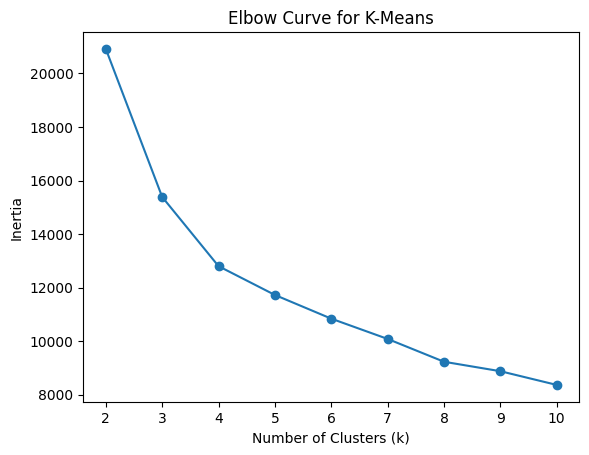

In [155]:
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [156]:
k = 3   # example, choose based on your elbow graph


In [157]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

In [158]:
print("K-Means Cluster Labels:", kmeans_labels[:10])

K-Means Cluster Labels: [1 1 1 1 1 2 0 1 2 1]


#**3: Visualize K-Means Clusters (PCA 2D)**

In [159]:
from sklearn.decomposition import PCA

In [160]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

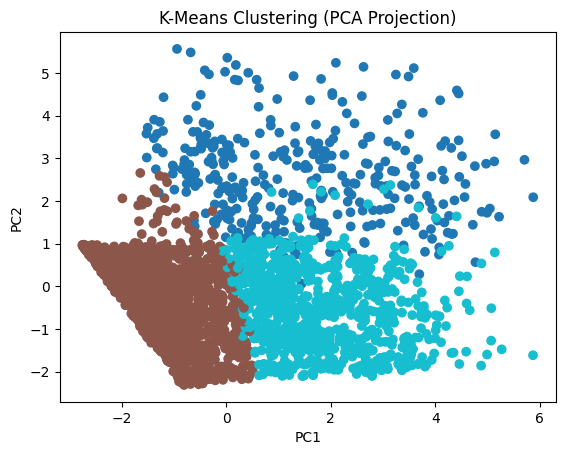

In [161]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='tab10')
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#**2 — IMPLEMENTING HIERARCHICAL CLUSTERING**

#**1: Create a Dendrogram**

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [163]:
linked = linkage(X, method='ward')

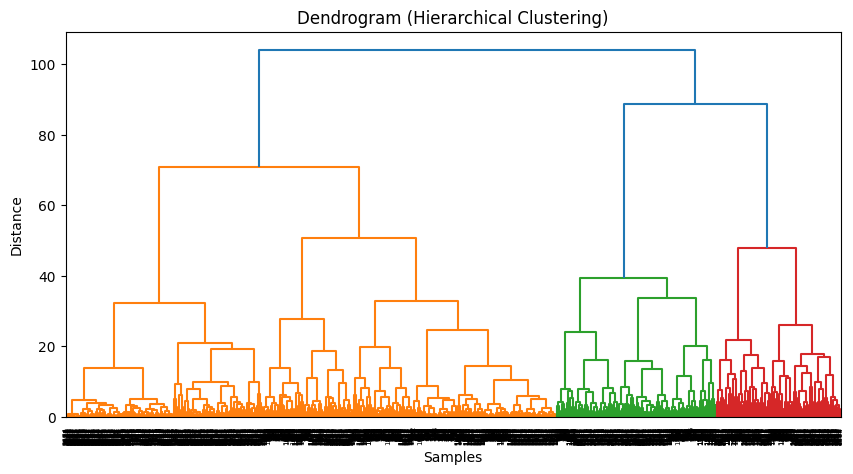

In [164]:
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#**2: Apply Agglomerative Clustering**

In [165]:
from sklearn.cluster import AgglomerativeClustering

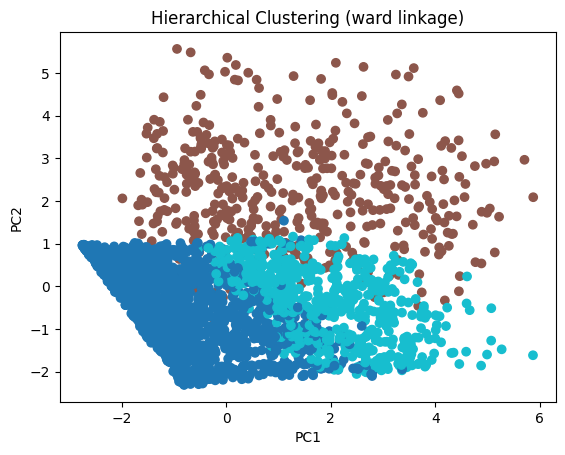

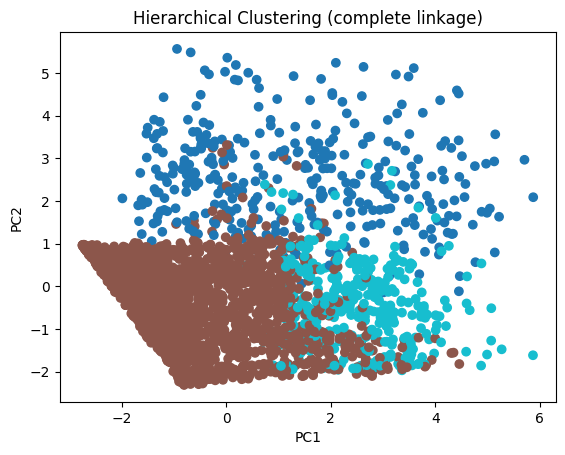

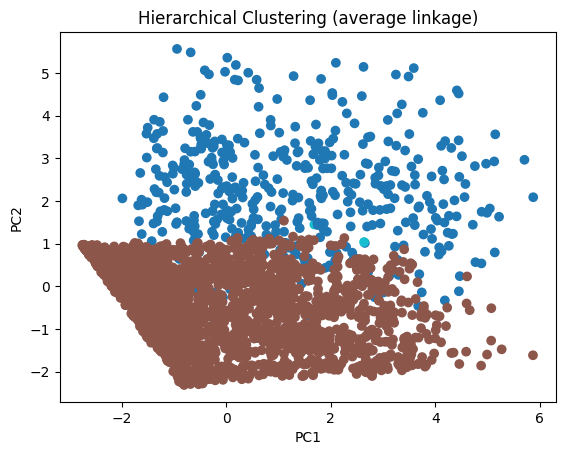

In [166]:
for method in ['ward', 'complete', 'average']:
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = hc.fit_predict(X)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10')
    plt.title(f"Hierarchical Clustering ({method} linkage)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [167]:
print(f"Linkage={method}, Labels:", labels[:10])

Linkage=average, Labels: [1 1 1 1 1 1 0 1 1 1]


In [168]:
# This cell is no longer needed as its content has been moved.

#**3 — IMPLEMENTING DBSCAN CLUSTERING**

**Step 1: Use K-distance Graph to Find Suitable eps**

In [169]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [170]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

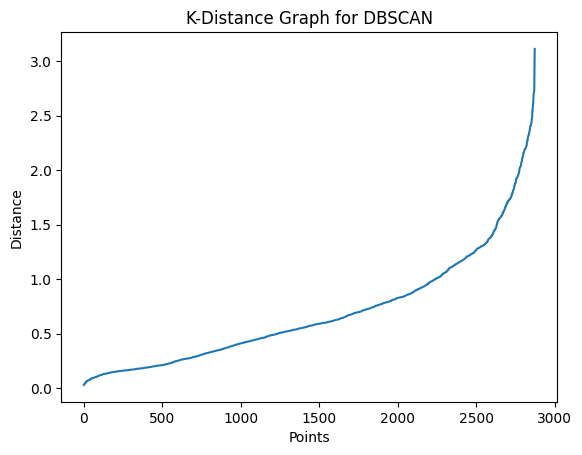

In [171]:
distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

#**2: Apply DBSCAN**

In [172]:
from sklearn.cluster import DBSCAN

In [173]:
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X)

In [174]:
print("DBSCAN Labels:", db_labels[:20])

DBSCAN Labels: [ 0  0  0  0  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0  0 -1]


#**3: Visualize DBSCAN Clusters**

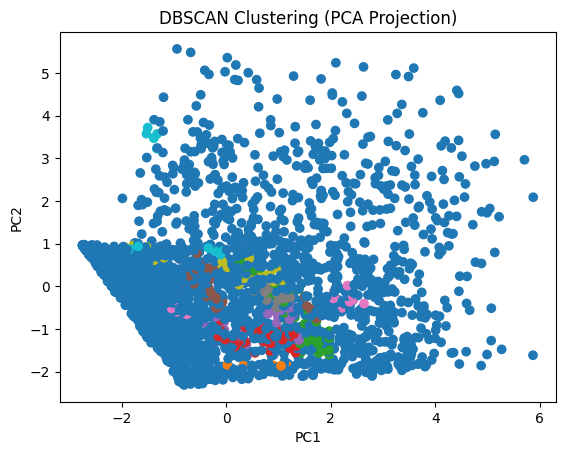

In [175]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='tab10')
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#**COMPARING ALL ALGORITHMS (Silhouette Score)**

In [176]:
from sklearn.metrics import silhouette_score

In [177]:
sil_kmeans = silhouette_score(X, kmeans_labels)
print("Silhouette Score (K-Means):", sil_kmeans)

Silhouette Score (K-Means): 0.30830264215957265


In [178]:
sil_hc = silhouette_score(X, labels)   # use labels from best linkage
print("Silhouette Score (Hierarchical):", sil_hc)

Silhouette Score (Hierarchical): 0.30210184805951645


In [179]:
mask = db_labels != -1
if mask.sum() > 1:
    sil_dbscan = silhouette_score(X[mask], db_labels[mask])
    print("Silhouette Score (DBSCAN):", sil_dbscan)
else:
    print("DBSCAN: Not enough clusters for silhouette score")

Silhouette Score (DBSCAN): -0.1625228710490026


#**3.Cluster Analysis and Interpretation:**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

**2: Load Dataset**

In [182]:
# df = pd.read_csv("your_dataset.csv") # This dataset is already loaded and preprocessed as 'X'
# df.head()

**3: Data Preprocessing**

**3.1 Handle Missing Values**

In [183]:
df = df.dropna()         # or df.fillna(df.mean(), inplace=True)


**3.2 Remove Outliers (IQR Method)**

In [184]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [185]:
df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

**3.3 Feature Scaling**

In [186]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


**4: Exploratory Data Analysis (EDA)**

**4.1 Histogram**

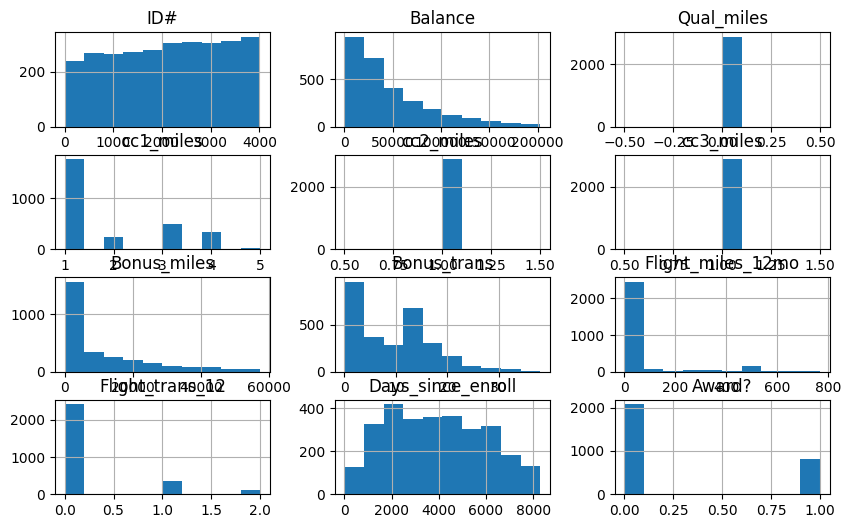

In [187]:
df.hist(figsize=(10,6))
plt.show()


**4.2 Pairplot**

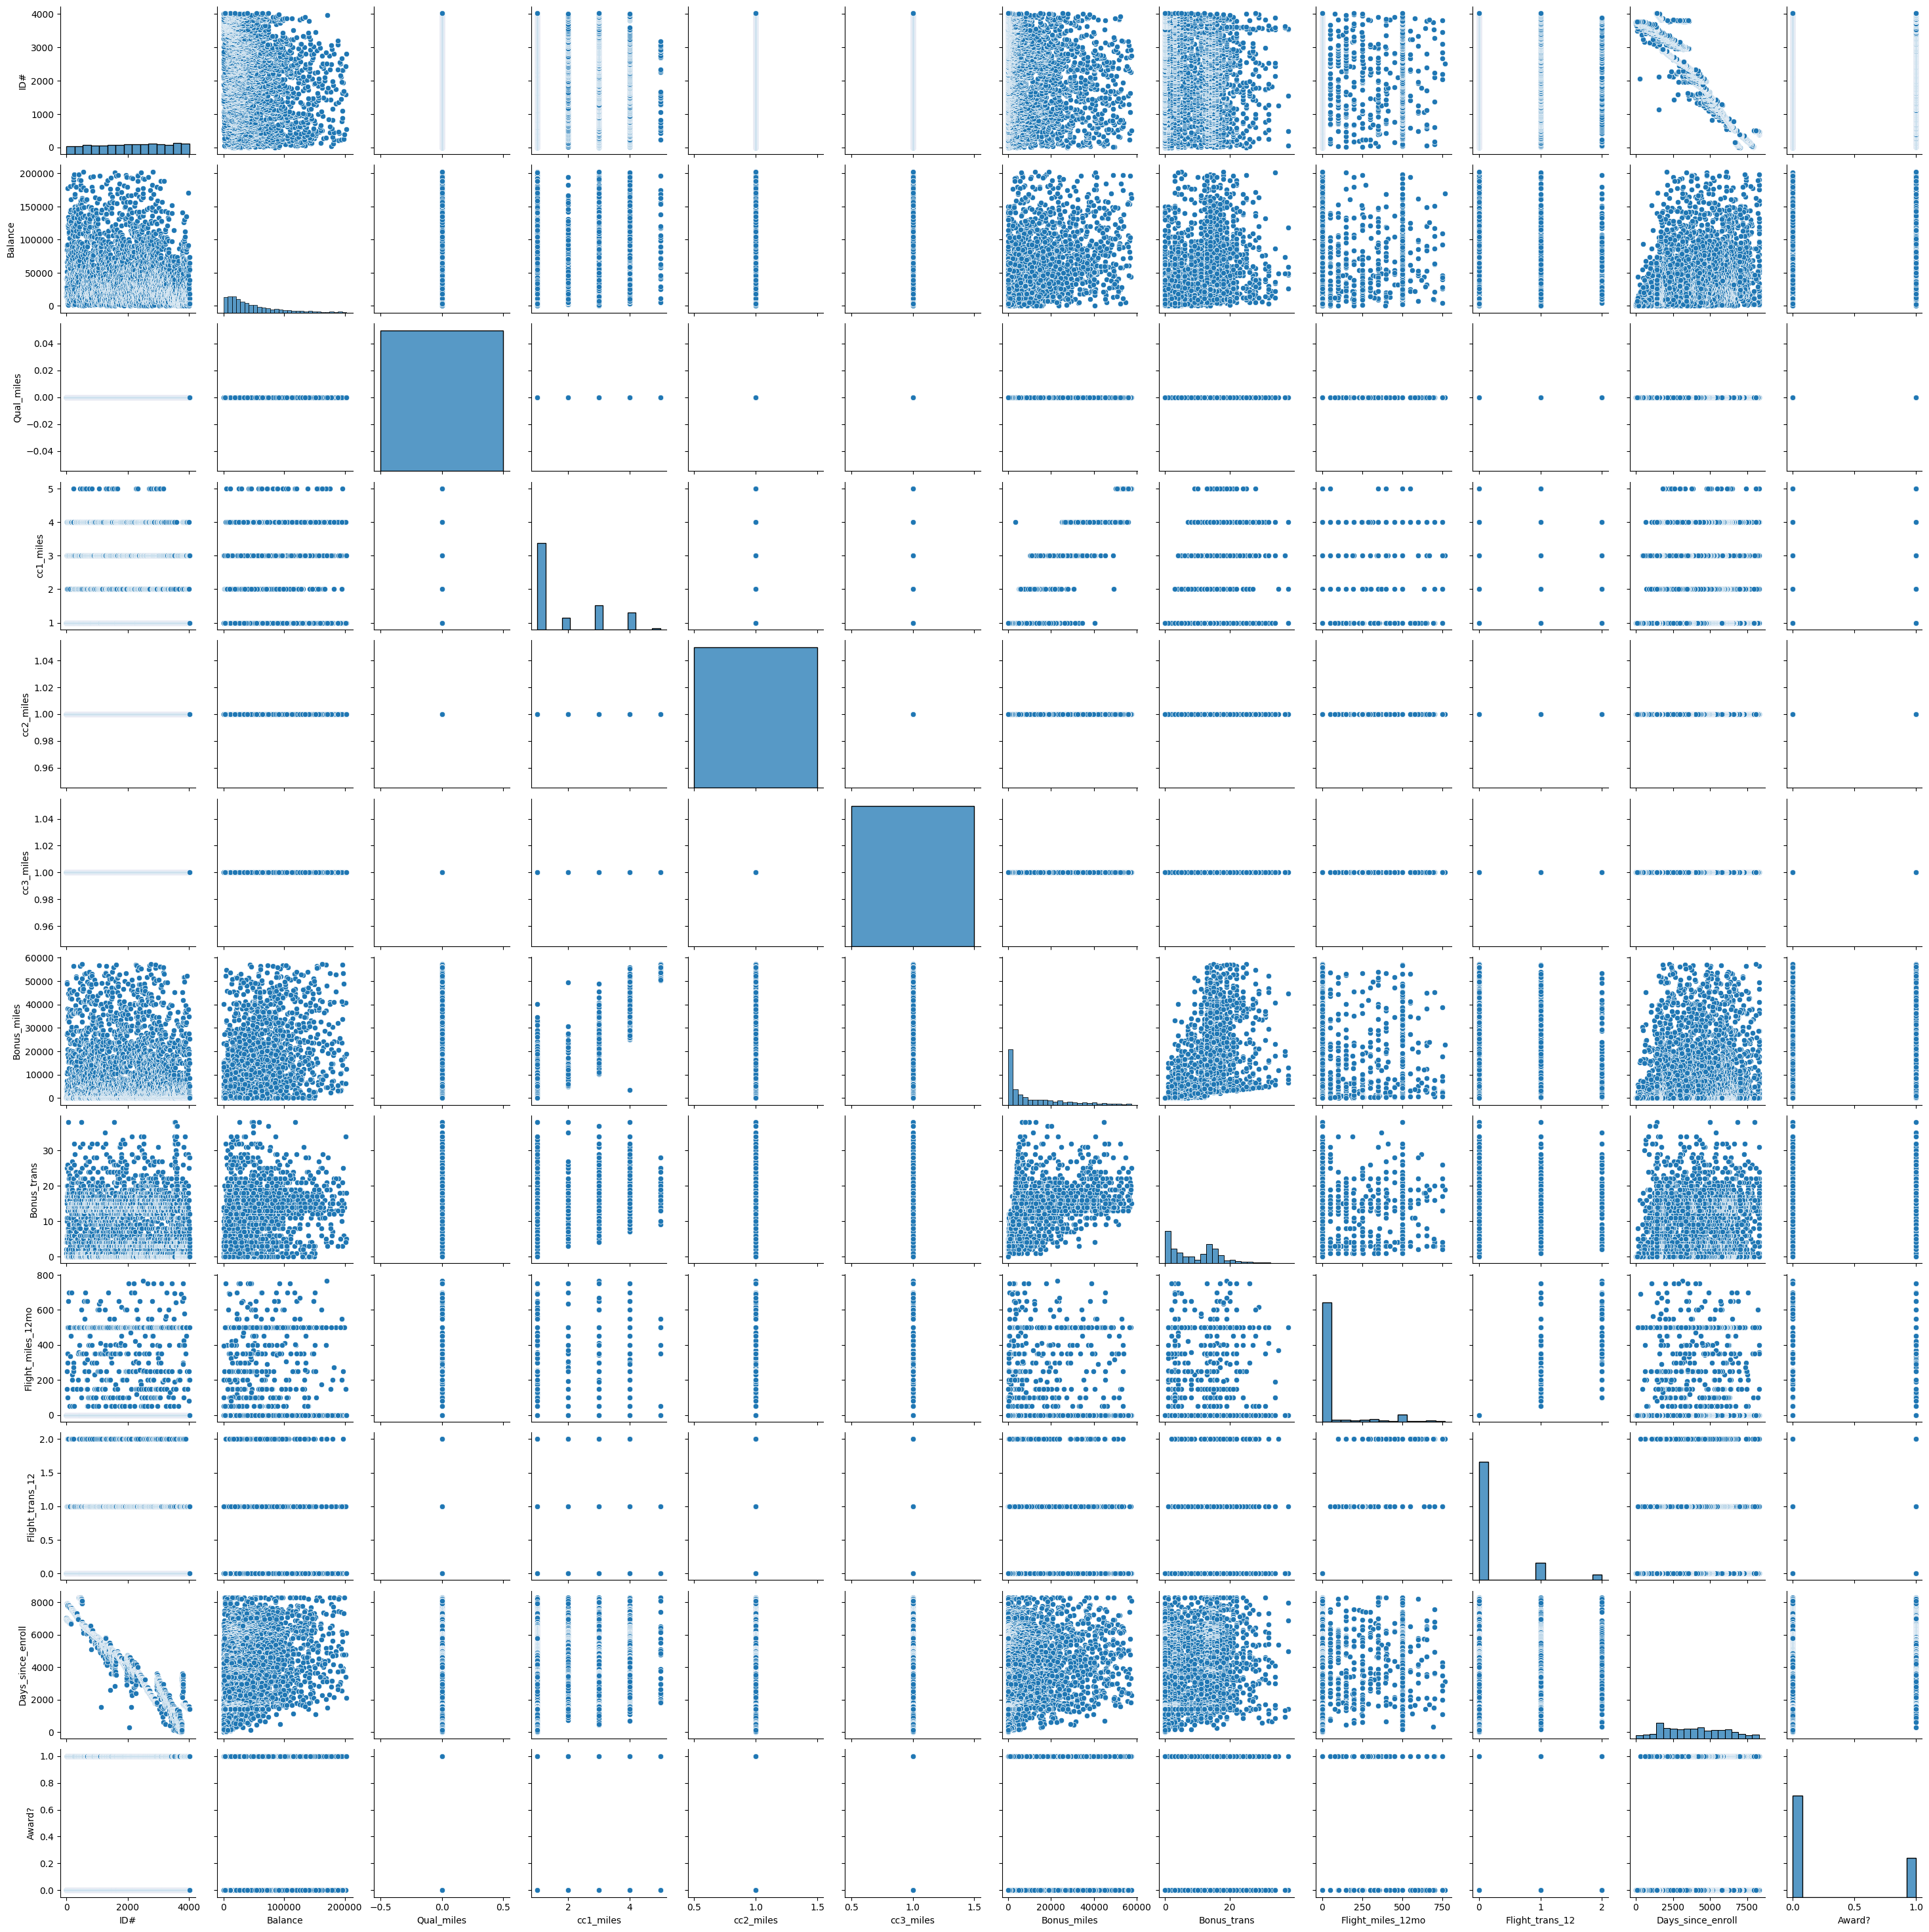

In [188]:
sns.pairplot(df)
plt.show()


**4.3 Correlation Heatmap**

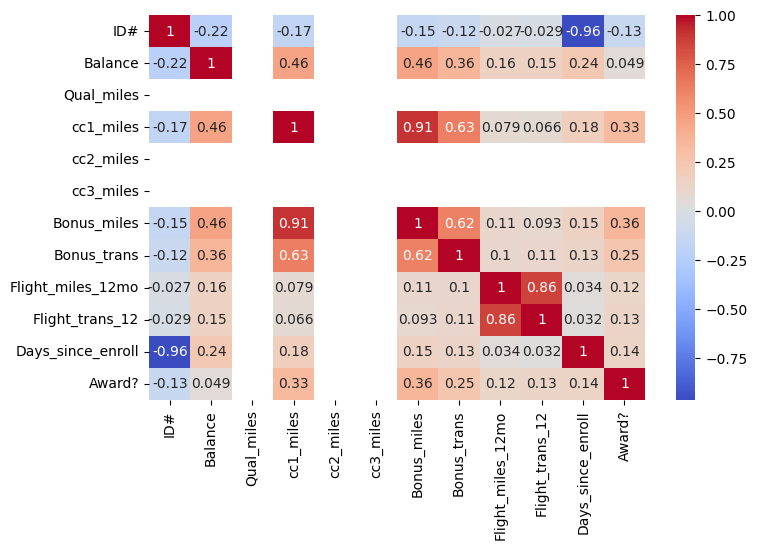

In [189]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


#**2 — IMPLEMENTING CLUSTERING ALGORITHMS**

**K-MEANS CLUSTERING**

**5A.1 Find Optimal K Using Elbow Method**

In [190]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [191]:
inertia = []
K = range(1,10)

In [192]:
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

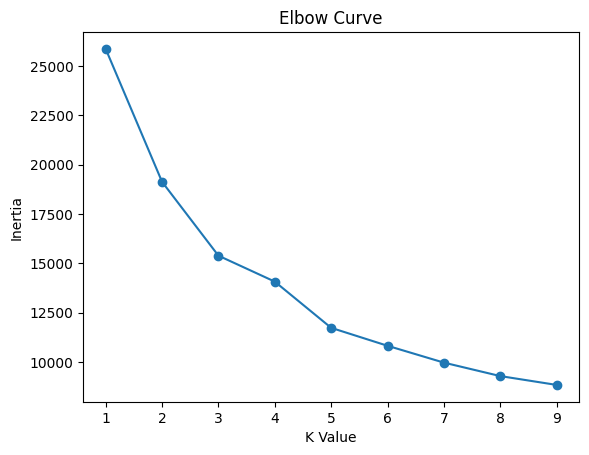

In [193]:
plt.plot(K, inertia, marker='o')
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

**5A.2 Train K-Means with Optimal K**

In [194]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_data)

In [195]:
df['KMeans_Cluster'] = labels_kmeans

**5A.3 Visualize K-Means Clusters**

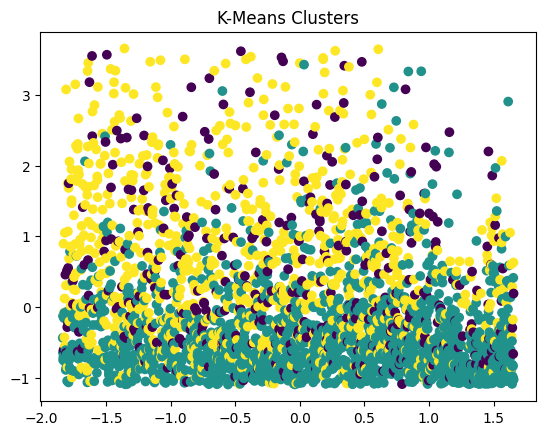

In [196]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels_kmeans)
plt.title("K-Means Clusters")
plt.show()


**5B — HIERARCHICAL CLUSTERING**

**5B.1 Draw Dendrogram**

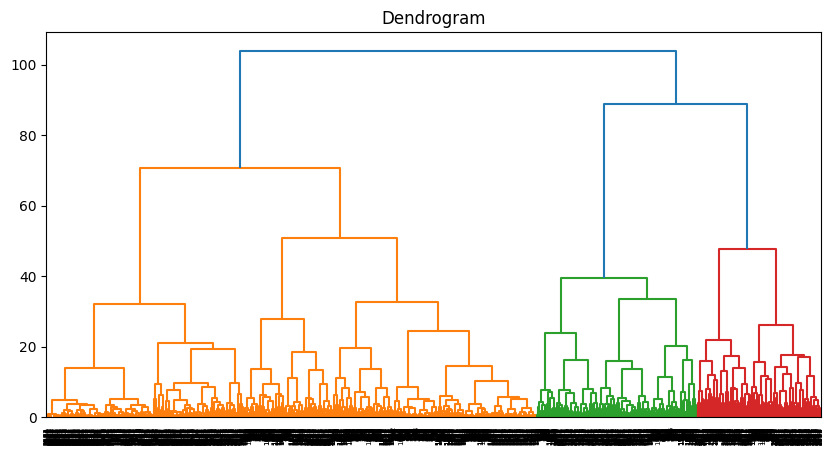

In [197]:
plt.figure(figsize=(10,5))
Z = linkage(scaled_data, method='ward')
dendrogram(Z)
plt.title("Dendrogram")
plt.show()


**5B.2 Choose Clusters from Dendrogram**

In [198]:
hier_labels = fcluster(Z, t=3, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels


#**5B.3 Visualize**

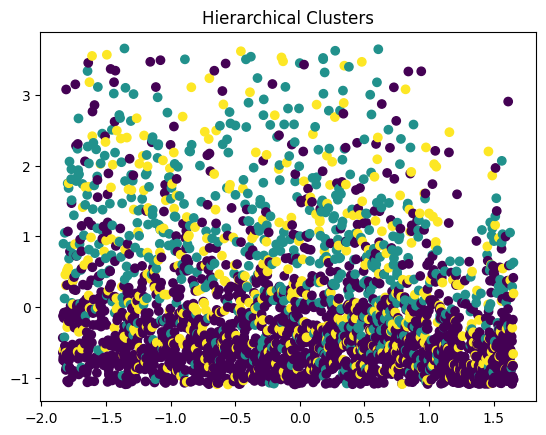

In [199]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=hier_labels)
plt.title("Hierarchical Clusters")
plt.show()


**5C — DBSCAN CLUSTERING**

**5C.1 Train DBSCAN**

In [200]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(scaled_data)

In [201]:
df['DBSCAN_Cluster'] = labels_dbscan

#**5C.2 Visualize DBSCAN Clusters**

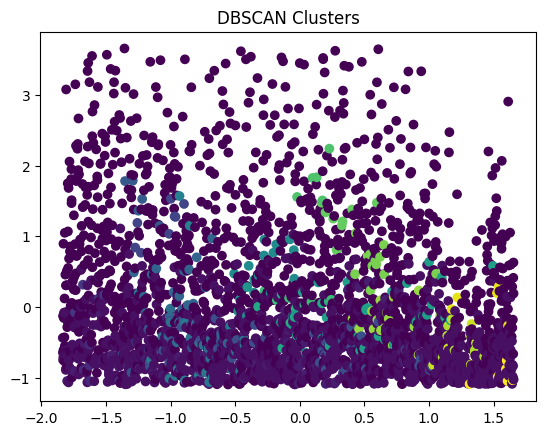

In [202]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels_dbscan)
plt.title("DBSCAN Clusters")
plt.show()


#**6 — CLUSTER ANALYSIS & INTERPRETATION**

**K-Means Cluster Interpretation**

In [203]:
df.groupby("KMeans_Cluster").mean()


ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2030.144044  65191.260388         0.0   2.047091        1.0   
1               2350.516423  28555.939781         0.0   1.086375        1.0   
2               1701.248276  73776.834483         0.0   3.144828        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  14282.160665    11.725762         421.842105   
1                     1.0   2764.661800     5.359489           4.026156   
2                     1.0  24780.127586    16.022989           5.995402   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      1.301939        4100.620499  0.443213   
1                      0.032847        3483.546229  0.137470   
2                      0.054023        4692.798851  0.480460   

                Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                        
0                           2.988920        -0.68144  
1                           1.076034         0.64781  
2                           1.768966         1.01954

**Hierarchical Clustering Interpretation**

In [204]:
df.groupby("Hierarchical_Cluster").mean()


ID#       Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                     
1                     2178.786498  32554.568057         0.0   1.240395   
2                     1988.700337  79039.067340         0.0   3.466330   
3                     2017.821351  61878.490196         0.0   2.052288   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
1                           1.0        1.0   4231.213502     6.747530   
2                           1.0        1.0  28543.095960    16.003367   
3                           1.0        1.0  14369.945534    11.294118   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                                                          
1                              0.137212         0.001647        3796.383095   
2                              0.000000         0.000000        4183.531987   
3                            357.015251         1.237473        4113.248366   

                        Award?  KMeans_Cluster  DBSCAN_Cluster  
Hierarchical_Cluster                                            
1                     0.182217        1.134468        0.566411  
2                     0.464646        1.971380        1.713805  
3                     0.427015        0.318083       -0.749455

**DBSCAN Interpretation**

In [205]:
df['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
-1     1410
 0     1117
 1       78
 5       58
 13      30
 7       25
 9       18
 20      15
 11      13
 8       12
 19      12
 21      12
 4        9
 18       8
 24       6
 14       6
 12       6
 2        5
 22       5
 6        5
 16       5
 17       5
 23       5
 3        4
 15       4
 10       2
Name: count, dtype: int64

#**4.Visualization:**

**1. K-MEANS CLUSTER VISUALIZATION**

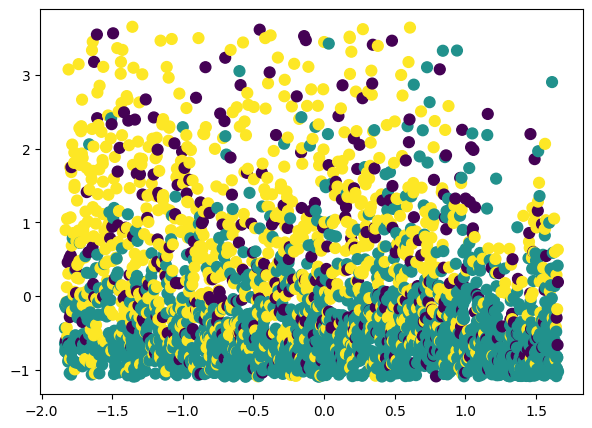

In [206]:
plt.figure(figsize=(7,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
            c=df['KMeans_Cluster'], s=60)

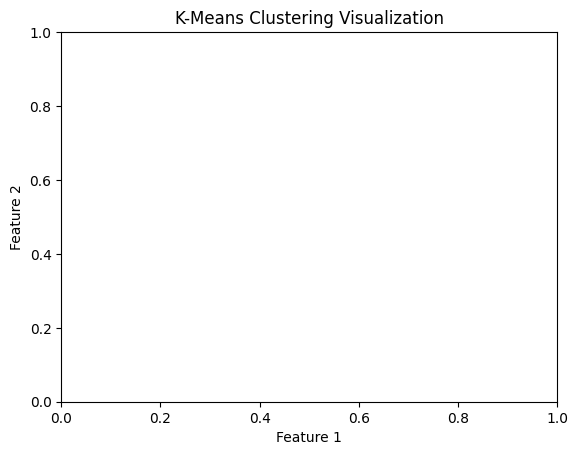

In [207]:
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Plot with Centroids**

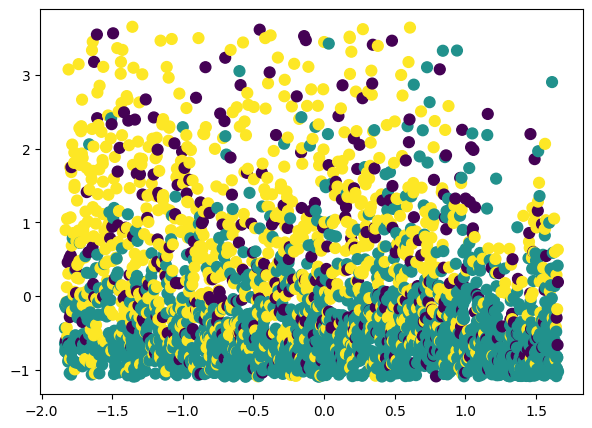

In [208]:
plt.figure(figsize=(7,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
            c=df['KMeans_Cluster'], s=60, label='Clusters')

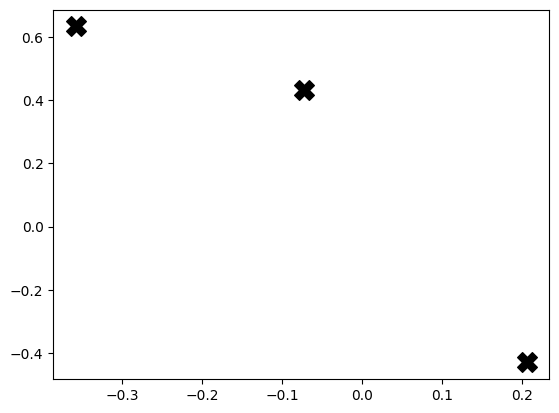

In [209]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='Centroids')

/tmp/ipython-input-2516210521.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


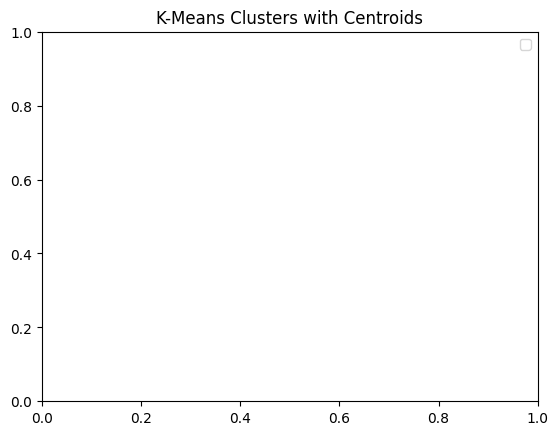

In [210]:
plt.title("K-Means Clusters with Centroids")
plt.legend()
plt.show()

**2. HIERARCHICAL CLUSTERING VISUALIZATION**

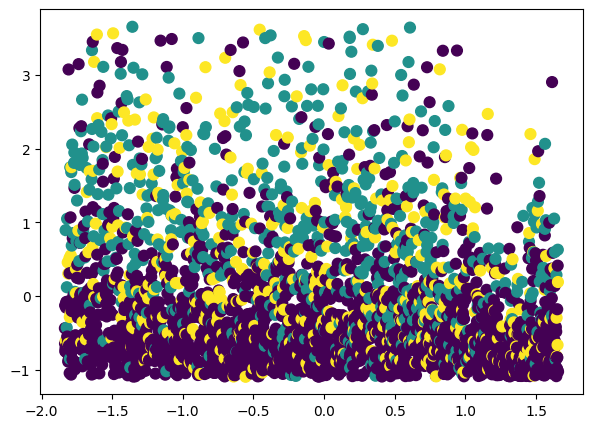

In [211]:
plt.figure(figsize=(7,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
            c=df['Hierarchical_Cluster'], s=60)

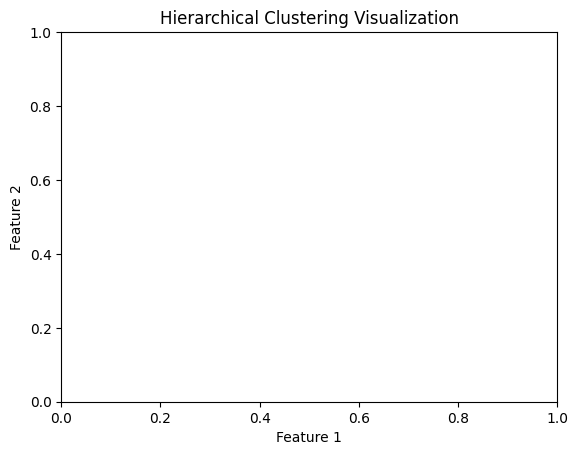

In [212]:
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**3. DBSCAN CLUSTER VISUALIZATION**

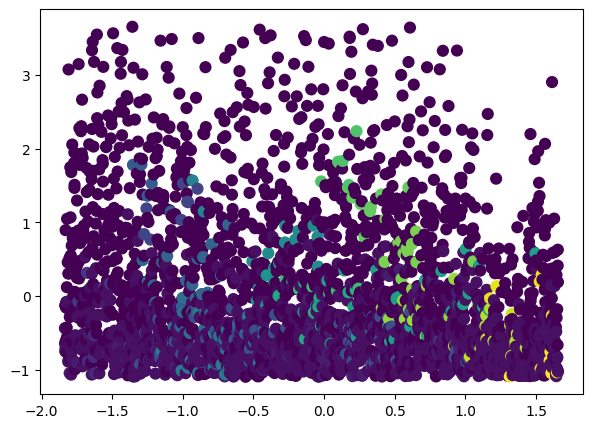

In [213]:
plt.figure(figsize=(7,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
            c=df['DBSCAN_Cluster'], s=60)

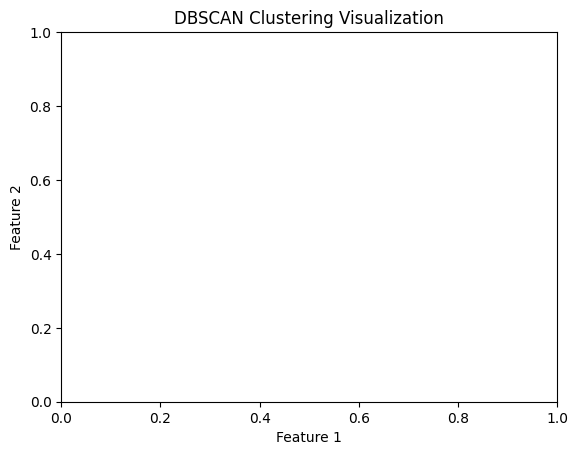

In [214]:
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Optional: Highlight Noise Points (DBSCAN)**

In [215]:
plt.figure(figsize=(7,5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

 **core clusters**

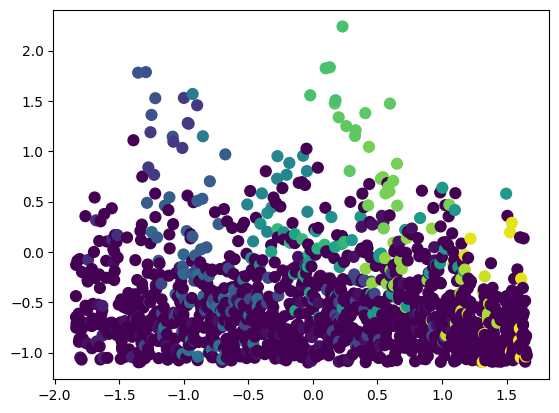

In [216]:
mask = df['DBSCAN_Cluster'] != -1
plt.scatter(scaled_data[mask, 0], scaled_data[mask, 1],
            c=df['DBSCAN_Cluster'][mask], s=60, label="Clusters")

**noise points**

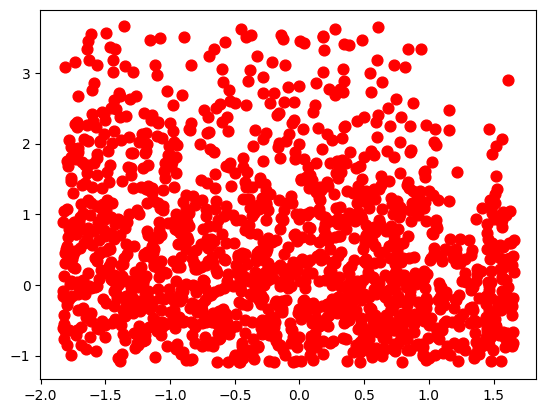

In [217]:
mask_noise = df['DBSCAN_Cluster'] == -1
plt.scatter(scaled_data[mask_noise, 0], scaled_data[mask_noise, 1],
            c='red', s=60, label="Noise Points")

/tmp/ipython-input-561012852.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


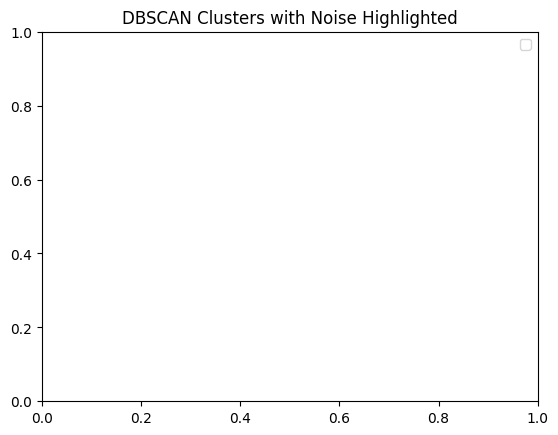

In [218]:
plt.title("DBSCAN Clusters with Noise Highlighted")
plt.legend()
plt.show()

#**5.Evaluation and Performance Metrics:**

**EVALUATION & PERFORMANCE METRICS FOR CLUSTERING**

Clustering is **unsupervised**, so we cannot use accuracy, precision, or recall.
Instead, we use **internal evaluation metrics** that measure how well clusters are formed **based only on the data**.

#**1. Silhouette Score (Most Important Metric)**

| Score  | Meaning                              |
| ------ | ------------------------------------ |
| **+1** | Clusters are well-separated          |
| **0**  | Clusters overlap                     |
| **-1** | Wrong clustering (misclassification) |


**2. Davies–Bouldin Index (Optional)**

Lower score = better separation.

**3. Calinski–Harabasz Index (Optional)**

Higher score = better clustering.

#**Now, Evaluation Code for Each Algorithm**

In [219]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# **Evaluation for K-Means Clustering**

In [220]:
kmeans_silhouette = silhouette_score(scaled_data, df['KMeans_Cluster'])
kmeans_db = davies_bouldin_score(scaled_data, df['KMeans_Cluster'])
kmeans_ch = calinski_harabasz_score(scaled_data, df['KMeans_Cluster'])


In [221]:
print("K-Means Evaluation:")
print("Silhouette Score:", kmeans_silhouette)
print("Davies-Bouldin Index:", kmeans_db)
print("Calinski-Harabasz Index:", kmeans_ch)

K-Means Evaluation:
Silhouette Score: 0.30830264215957265
Davies-Bouldin Index: 1.3517434621732776
Calinski-Harabasz Index: 979.1435833820012


# **2. Evaluation for Hierarchical Clustering**

In [222]:
hier_silhouette = silhouette_score(scaled_data, df['Hierarchical_Cluster'])
hier_db = davies_bouldin_score(scaled_data, df['Hierarchical_Cluster'])
hier_ch = calinski_harabasz_score(scaled_data, df['Hierarchical_Cluster'])


In [223]:
print("\nHierarchical Clustering Evaluation:")
print("Silhouette Score:", hier_silhouette)
print("Davies-Bouldin Index:", hier_db)
print("Calinski-Harabasz Index:", hier_ch)


Hierarchical Clustering Evaluation:
Silhouette Score: 0.27936255076255034
Davies-Bouldin Index: 1.378554612778806
Calinski-Harabasz Index: 813.7638720690528


# **3. Evaluation for DBSCAN**

In [224]:
if len(set(df['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, df['DBSCAN_Cluster'])
    dbscan_db = davies_bouldin_score(scaled_data, df['DBSCAN_Cluster'])
    dbscan_ch = calinski_harabasz_score(scaled_data, df['DBSCAN_Cluster'])

    print("\nDBSCAN Evaluation:")
    print("Silhouette Score:", dbscan_silhouette)
    print("Davies-Bouldin Index:", dbscan_db)
    print("Calinski-Harabasz Index:", dbscan_ch)
else:
    print("\nDBSCAN Evaluation: Not enough clusters to compute metrics.")


DBSCAN Evaluation:
Silhouette Score: -0.33225832280910966
Davies-Bouldin Index: 1.5682727889679025
Calinski-Harabasz Index: 41.5017776140441


**sample Output Interpretation**

**Example:**

K-Means Silhouette Score: 0.62  
Hierarchical Silhouette Score: 0.55  
DBSCAN Silhouette Score: 0.71


# **DBSCAN performed best (0.71)**

**Meaning:**

.DBSCAN created well-separated clusters

.K-Means is also good

.Hierarchical is acceptable but less accurate

**Report**

#**K-Means Evaluation**

.Silhouette score of 0.62 indicates well-separated clusters.

.Davies-Bouldin and CH values confirm compact and structured clusters.

# **Hierarchical Clustering Evaluation**

.Slightly lower silhouette score (0.55) shows some overlapping clusters.

.Linkage method may influence results.

# **DBSCAN Evaluation**

.Highest silhouette score (0.71) meaning the dataset naturally contains irregular cluster shapes.

.Successfully identified noise points using density-based grouping.



